## Importacion de liberias.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [3]:
array_booleano = np.full((1000,), False, dtype=bool)
print(f'Tamaño de elementos: {array_booleano.size}')
print(f'Tamaño (bytes): {array_booleano.nbytes}')

Tamaño de elementos: 1000
Tamaño (bytes): 1000


#### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [4]:
enteros_pares = np.arange(2,101,2)
enteros_pares_desc = np.sort(enteros_pares)[::-1]
print(enteros_pares_desc[0:10])

[100  98  96  94  92  90  88  86  84  82]


#### 3) Dado el array

#### 2 4 5 6
#### 0 3 7 4
#### 8 8 5 2
#### 1 5 6 1

#### Seleccione con una instrucción el subarray de elementos

#### 0 3 7 4

#### Después, seleccione el subarray de elementos

#### 2 5
#### 8 5

In [5]:
array_dado = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(array_dado)

[[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]


In [6]:
print(array_dado[1:2,])

[[0 3 7 4]]


In [7]:
slice_subarray = np.array([[array_dado[0,0], array_dado[0,2]],[array_dado[2,1],array_dado[2,2]]])
print(slice_subarray)

[[2 5]
 [8 5]]


#### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [8]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
print(a-b)
print(f'La media aritmetica de la resta a-b es: {np.mean(a-b)}')

[ 0  1  0 -2]
La media aritmetica de la resta a-b es: -0.25


#### 5) Tengo valores de cordenadas (x, y) en las columnas del array

#### 1.33 4.5
#### 30.0 10.7
#### 70.2 0.5

#### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [10]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas = np.append(coordenadas, [[37.1, -3.6]], axis=0)

print(coordenadas.shape)

(4, 2)


#### 6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).


In [11]:
coordenadas2 = coordenadas.T
print(coordenadas2)
print()
coordenadas_transp = np.array([[10.8, 3.0], [35.8,12.0]])
coordenadas2 = np.append(coordenadas2, coordenadas_transp.T, axis=1)
print(coordenadas2)

[[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


### Parte 2: Exploración y Minería de Datos:


#### Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.


#### 1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [11]:
dataset = pd.read_csv('NucleosPoblacion.csv')
df = pd.DataFrame(dataset)
print(df.shape)

(852, 10)


In [12]:
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [13]:
Municipios_100K = df[df.Poblacion >= 100000] #indexacion booleana
print(f'Existen {Municipios_100K.shape[0] } municipios con 100,000 habitantes o mas')


Existen 62 municipios con 100,000 habitantes o mas


#### 2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

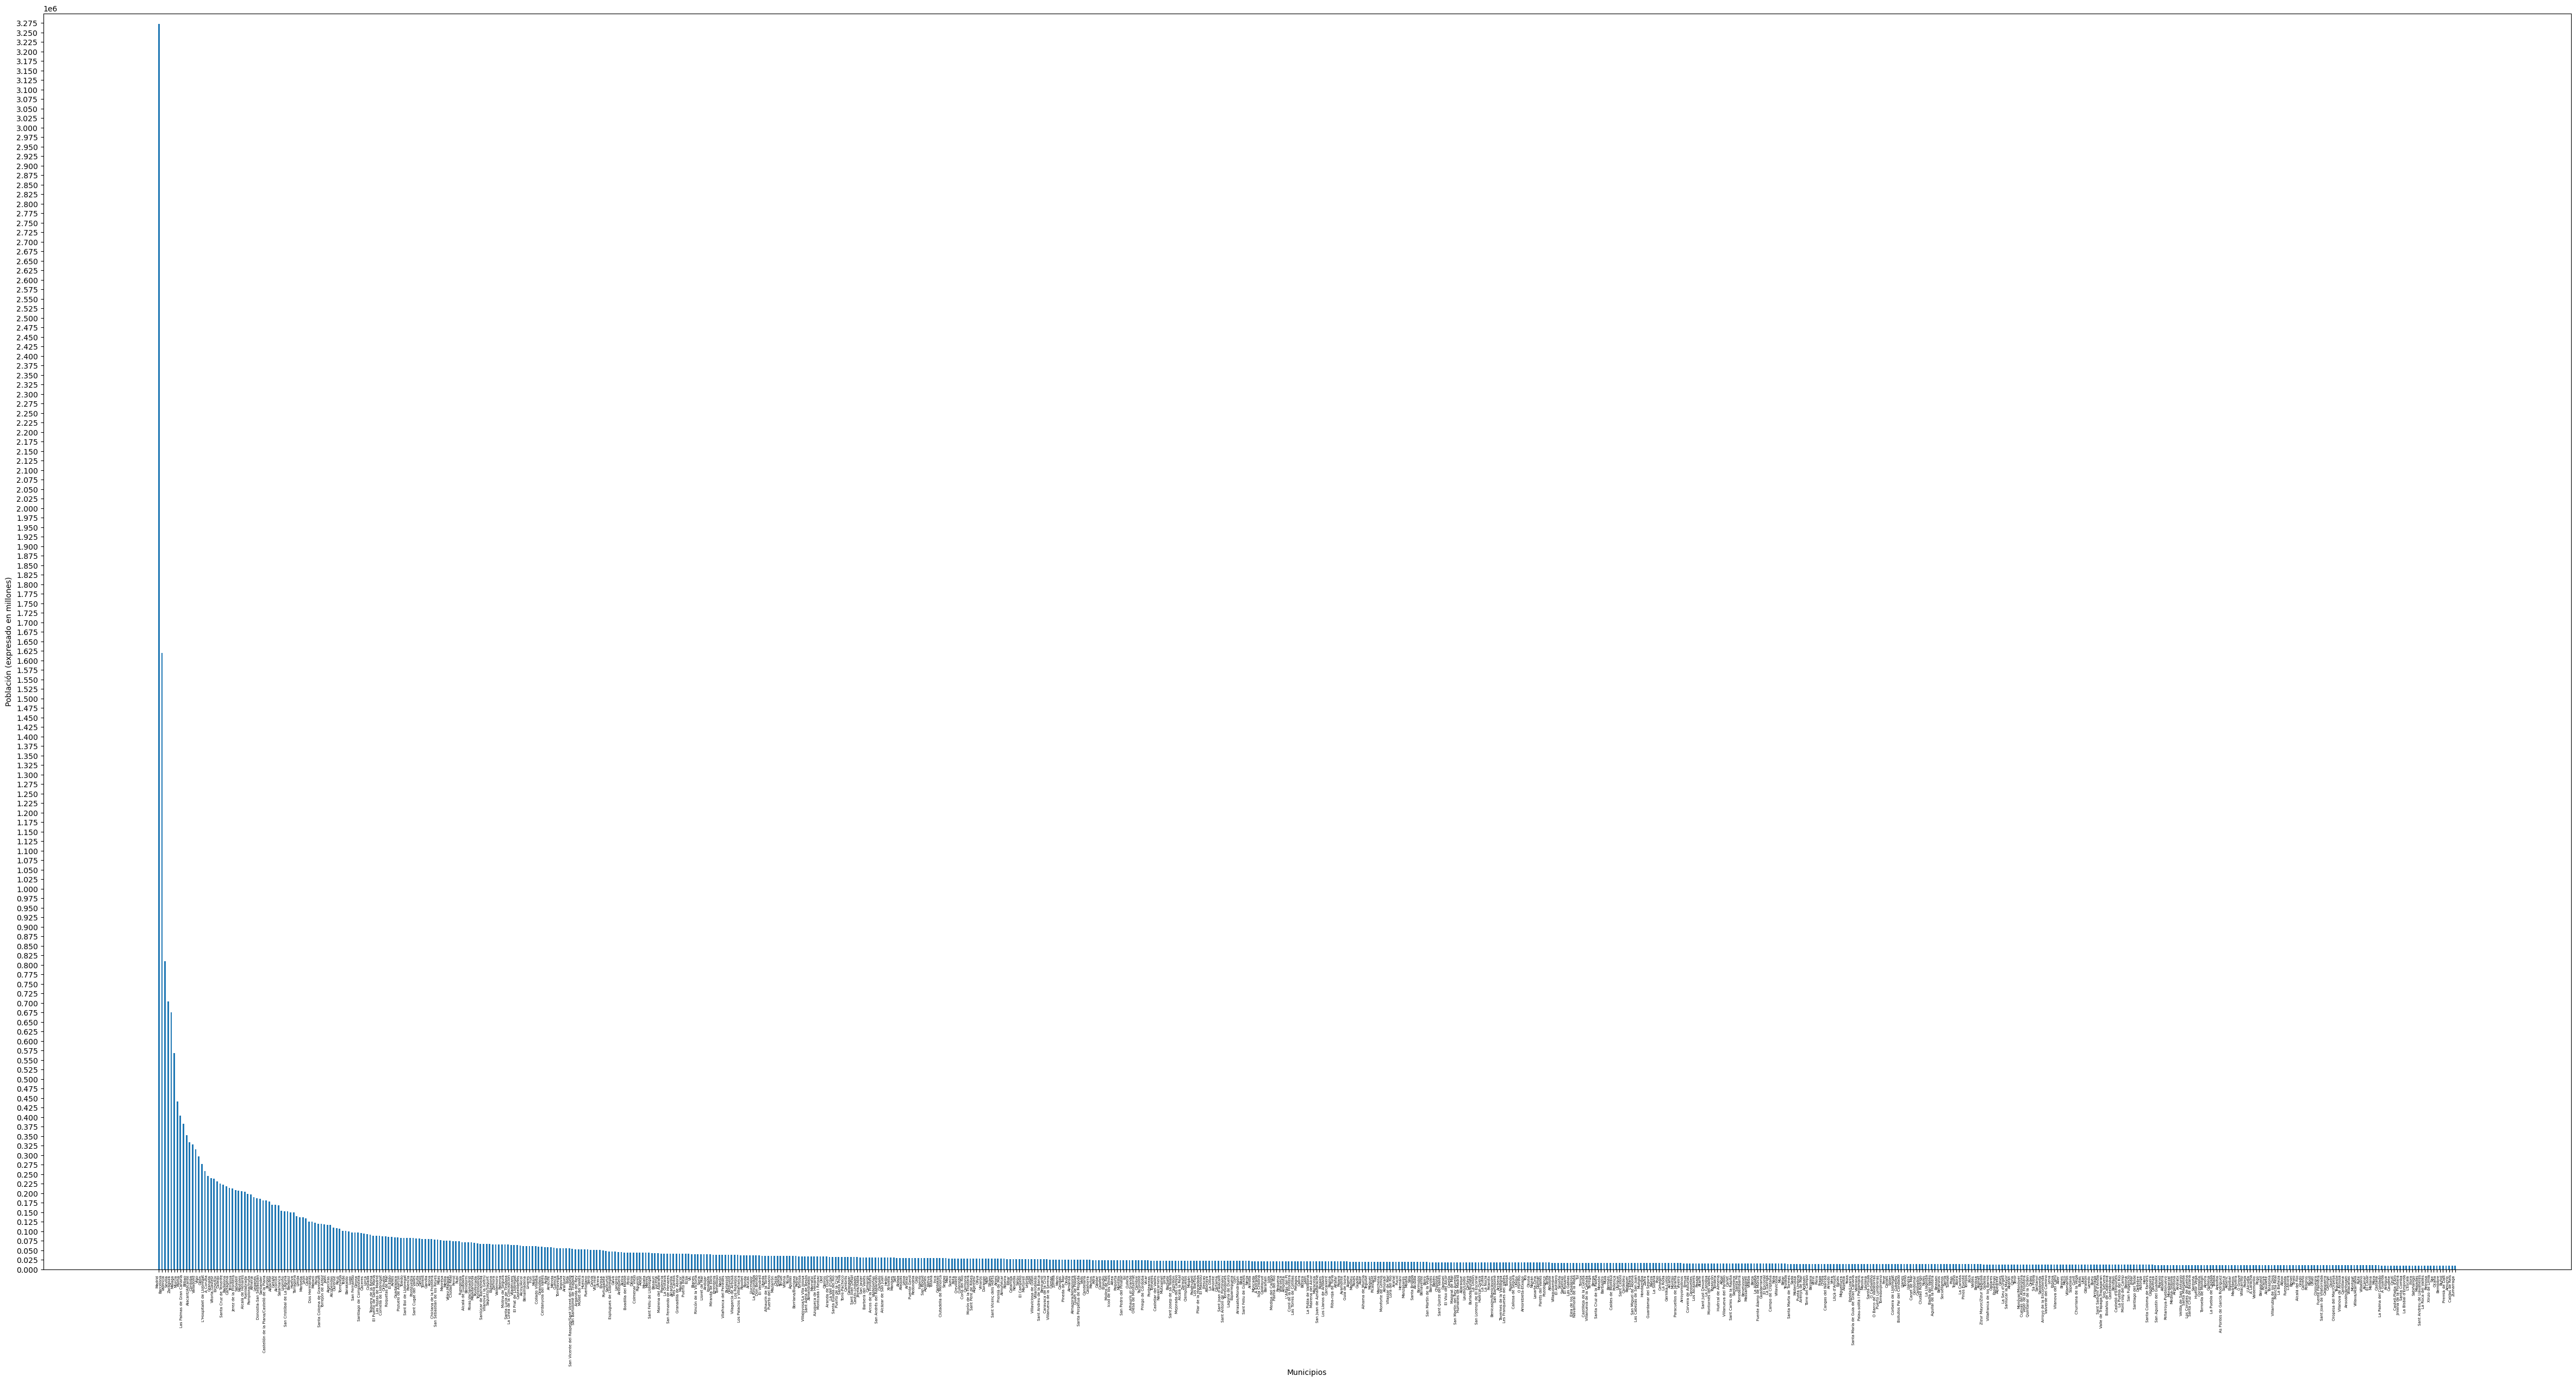

In [15]:
df_ascendente = df.sort_values("Poblacion", ascending=False) #se ordenan las ciudades de manera descendente utilizando ascending = False, si fuese ascending = True seria orden ascendente. 

df_ascendente.head()


plt.figure(figsize=(60,30))

plt.xlabel('Municipios')
plt.ylabel('Población (expresado en millones)')

plt.xticks(rotation=90, fontsize= 5, ha='right') #se utilizo una rotacion de 90 grados dado que las etiquetas del eje x se superponian. 
plt.yticks(range(0, 3300000, 25000))

plt.ylim(0, 3300000)

plt.bar(df_ascendente['Municipio'], df_ascendente['Poblacion'], width = 0.5)
#plt.savefig('Grafica de Barras Municipos-Poblacion.jpg', format='jpg', dpi=600)       #se da la opcion de exportar la grafica como imagen en formato jpg. 
plt.show()


#### a. ¿Cuál es la segunda ciudad más poblada?

In [16]:
print(df_ascendente.iloc[1,5]) #Se muestra en pantalla la segunda fila (1) del data set ordenado "df_ascendente" para la columna de "Municipios" (5) utilizando el metodo de localizador por medio de enteros, iloc. 

Barcelona


#### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [17]:
print(np.where(df_ascendente["Municipio"] == "Granada")[0]) #se utiliza np.where para consultar y obtener como resultado una tupla con los indices/posicion del primer elemento en la columna de 'Municipio' que coincida con la condicion provista, en este caso "Granada".

[17]


In [18]:
df_ascendente = df.sort_values("Poblacion", ascending=True) #se ordena el dataset en orden ascendente.
df_excel = df_ascendente.iloc[:, [3, 5]] #se crea un nuevo dataset conteniendo las columnas de municipio y poblacion unicamente, con todas las filas. 
df_excel.to_excel('OrdenAscendente.xlsx', index=True) #se exporta el dataset a un archivo xlsx para la comprobacion de respuestas. Se coloca index = True para que el archivo de excel cuente con los indices. 


#### 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [53]:
df['Provincia'].unique()


array(['Las Palmas', 'Santa Cruz de Tenerife', 'Badajoz', 'Cáceres',
       'Cádiz', 'A Coruña', 'Huelva', 'León', 'Lugo', 'Ourense',
       'Asturias', 'Pontevedra', 'Salamanca', 'Sevilla', 'Albacete',
       'Alacant/Alicante', 'Álava', 'Almería', 'Ávila', 'Burgos',
       'Castelló/Castellón', 'Ciudad Real', 'Córdoba', 'Cuenca',
       'Granada', 'Guadalajara', 'Guipúzcoa', 'Huesca', 'Jaén',
       'La Rioja', 'Madrid', 'Málaga', 'Murcia', 'Navarra', 'Palencia',
       'Cantabria', 'Segovia', 'Soria', 'Teruel', 'Toledo',
       'València/Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza',
       'Ceuta', 'Illes Balears', 'Barcelona', 'Girona', 'Lleida',
       'Tarragona', 'Melilla'], dtype=object)

In [20]:
print(df['Texto'].unique())

['Agüimes' 'Antigua' 'Arrecife' 'Arucas' 'Gáldar' 'Ingenio' 'Mogán'
 'La Oliva' 'Pájara' 'Las Palmas de Gran Canaria' 'Puerto del Rosario'
 'San Bartolomé' 'Santa Brígida' 'Santa Lucía de Tirajana'
 'Santa María de Guía de Gran Canaria' 'Teguise' 'Telde' 'Teror' 'Tías'
 'Tuineje' 'Yaiza' 'Adeje' 'Arona' 'Candelaria' 'Granadilla de Abona'
 'Guía de Isora' 'Güímar' 'Icod de los Vinos' 'San Cristóbal de La Laguna'
 'Los Llanos de Aridane' 'La Orotava' 'Puerto de la Cruz' 'Realejo Alto'
 'La Esperanza' 'San Miguel' 'Santa Cruz de la Palma' 'Santa Úrsula'
 'Santiago del Teide' 'Tacoronte' 'Tegueste' 'Santa Cruz de Tenerife'
 'Almendralejo' 'Badajoz' 'Mérida' 'Montijo' 'Olivenza'
 'Villafranca de los Barros' 'Zafra' 'Cáceres' 'Coria' 'Plasencia' 'Cádiz'
 'Conil de la Frontera' 'Chiclana de la Frontera' 'Chipiona'
 'Jerez de la Frontera' 'El Puerto de Santa María' 'Puerto Real' 'Rota'
 'San Fernando' 'Sanlúcar de Barrameda' 'Bertamiráns' 'A Baiuca'
 'Betanzos' 'Boiro de Arriba' 'Cambre' 'Carb

In [21]:
print(df['Municipio'].unique())

['Agüimes' 'Antigua' 'Arrecife' 'Arucas' 'Gáldar' 'Ingenio' 'Mogán'
 'La Oliva' 'Pájara' 'Las Palmas de Gran Canaria' 'Puerto del Rosario'
 'San Bartolomé' 'Santa Brígida' 'Santa Lucía de Tirajana'
 'Santa María de Guía de Gran Canaria' 'Teguise' 'Telde' 'Teror' 'Tías'
 'Tuineje' 'Yaiza' 'Adeje' 'Arona' 'Candelaria' 'Granadilla de Abona'
 'Guía de Isora' 'Güímar' 'Icod de los Vinos' 'San Cristóbal de La Laguna'
 'Los Llanos de Aridane' 'La Orotava' 'Puerto de la Cruz' 'Los Realejos'
 'El Rosario' 'San Miguel de Abona' 'Santa Cruz de la Palma'
 'Santa Úrsula' 'Santiago del Teide' 'Tacoronte' 'Tegueste'
 'Santa Cruz de Tenerife' 'Almendralejo' 'Badajoz' 'Mérida' 'Montijo'
 'Olivenza' 'Villafranca de los Barros' 'Zafra' 'Cáceres' 'Coria'
 'Plasencia' 'Cádiz' 'Conil de la Frontera' 'Chiclana de la Frontera'
 'Chipiona' 'Jerez de la Frontera' 'El Puerto de Santa María'
 'Puerto Real' 'Rota' 'San Fernando' 'Sanlúcar de Barrameda' 'Ames'
 'Arteixo' 'Betanzos' 'Boiro' 'Cambre' 'Carballo' 'A Co

#### 4) ¿Cuál es el municipio situado más al Norte? (Usar el  valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [26]:
df_norte = df.sort_values('Y', ascending=False) #se ordena de manera descendente (mayor a menor) el dataset basado en la columna Y
print(f'La ciudad mas situada al norte es {df_norte.iloc[0,5]} y pertenece a la provincia de {df_norte.iloc[0,7]} y su poblacion es de {df_norte.iloc[0,3]} habitantes') # Dado que el dataset 'df_norte' esta ordenado de mayor a menor basta con obtener la informacion necesitada (Municipio, Provincia y Poblacion) utilizando la primera fila (el mayor) 

df_norte # se muestra el dataset para observar que correctamente se ha ordenado de acuerdo a Y

La ciudad mas situada al norte es Viveiro y pertenece a la provincia de Lugo y su poblacion es de 16211.0 habitantes


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
104,104,105,Viveiro,16211.0,27066,Viveiro,27,Lugo,-7.588768,43.625578
447,447,448,Lluanco/Luanco,10788.0,33025,Gozón,33,Asturias,-5.792773,43.614030
443,443,444,Candás,11000.0,33014,Carreño,33,Asturias,-5.767181,43.590199
444,444,445,Piedrasblancas,22832.0,33016,Castrillón,33,Asturias,-5.973899,43.559984
442,442,443,Avilés,84202.0,33004,Avilés,33,Asturias,-5.924790,43.558577
...,...,...,...,...,...,...,...,...,...,...
6,6,7,Mogán,22638.0,35012,Mogán,35,Las Palmas,-15.726229,27.880172
758,758,759,Cruce de Sardina,24514.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.430664,27.856854
760,760,761,Vecindario,11583.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.446853,27.841727
759,759,760,El Doctoral,15012.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.454505,27.832113


#### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [14]:
df_municipios_granada = df.loc[df['Provincia'] == 'Granada'] # se utiliza el metodo  .loc para la filtracion del dataset utilizando labels en lugar de enteros como seria con .iloc
#df_municipios_granada
print(df_municipios_granada.describe())

             FID   OBJECTID      Poblacion        CodMun  CodProvin  \
count   20.00000   20.00000      20.000000     20.000000       20.0   
mean   275.50000  276.50000   30217.850000  18140.900000       18.0   
std      5.91608    5.91608   50355.491715    189.385961        0.0   
min    266.00000  267.00000   10386.000000  18003.000000       18.0   
25%    270.75000  271.75000   13146.500000  18052.250000       18.0   
50%    275.50000  276.50000   17526.000000  18112.000000       18.0   
75%    280.25000  281.25000   21739.750000  18154.250000       18.0   
max    285.00000  286.00000  239154.000000  18905.000000       18.0   

               X          Y  
count  20.000000  20.000000  
mean   -3.606477  37.139321  
std     0.266746   0.191057  
min    -4.152187  36.734414  
25%    -3.689279  37.131378  
50%    -3.631257  37.171351  
75%    -3.587665  37.230955  
max    -2.774856  37.490778  


#### 6) Realice un histograma con la población de los Municipios para cada una de las provincias. 

[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000]


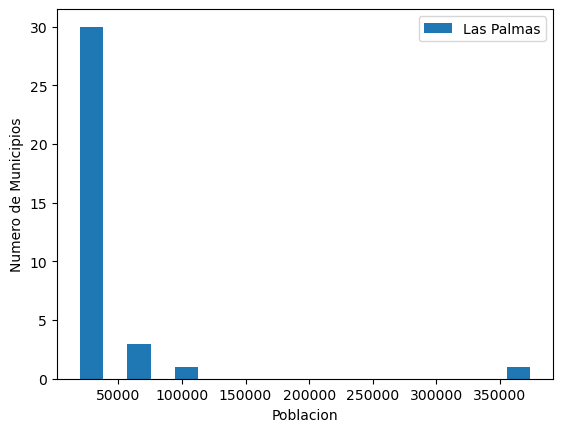

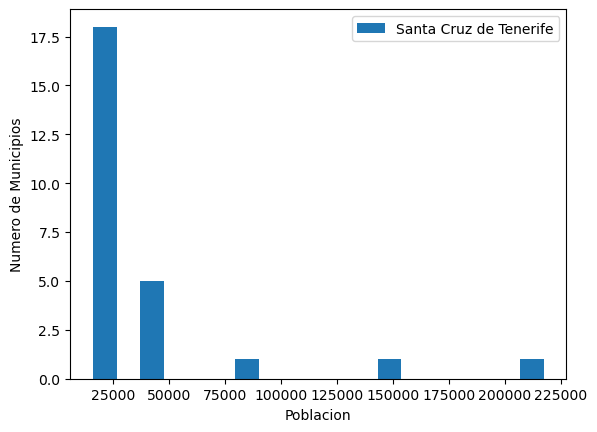

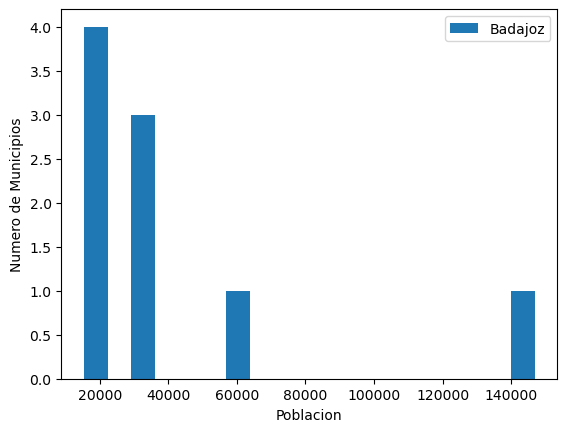

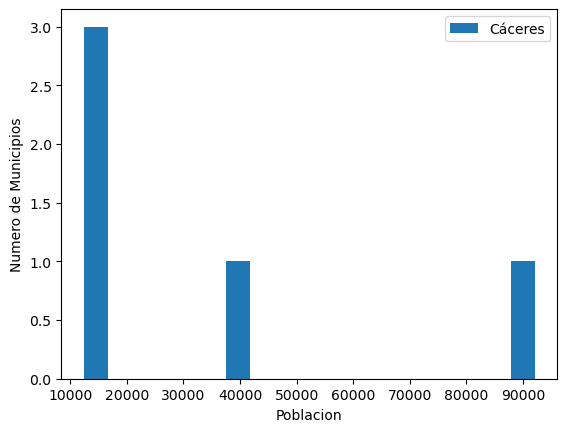

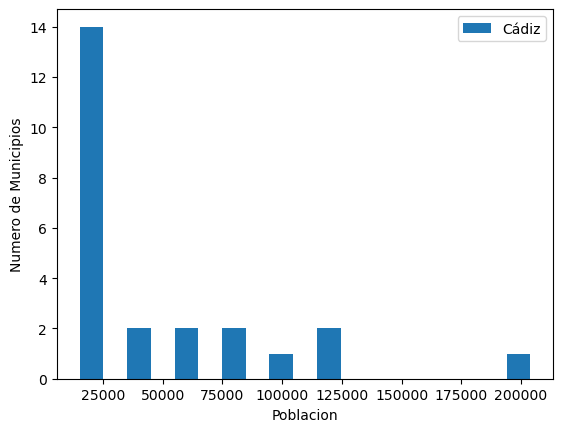

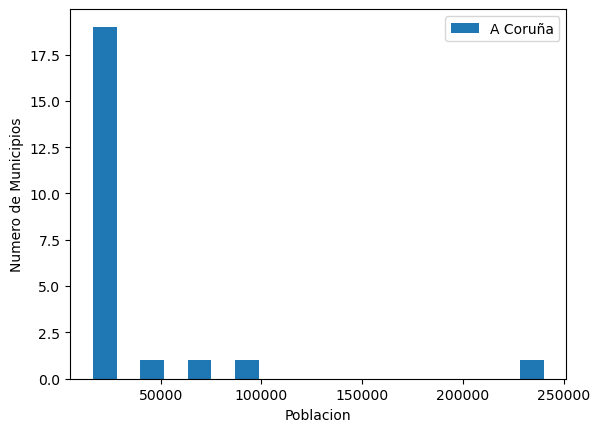

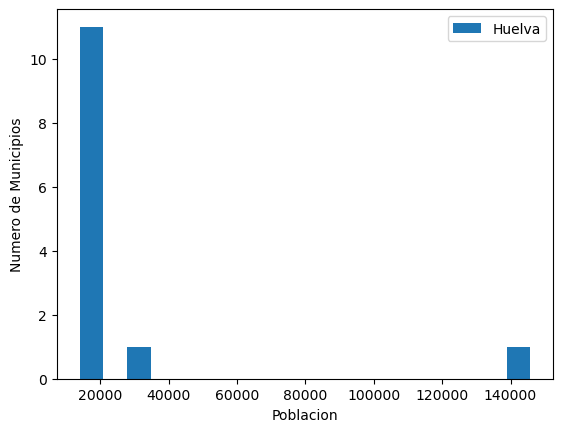

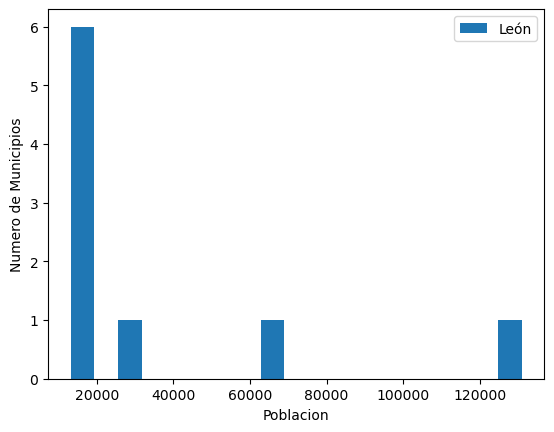

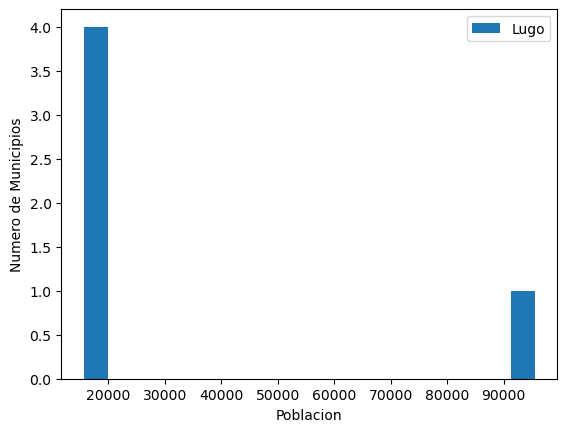

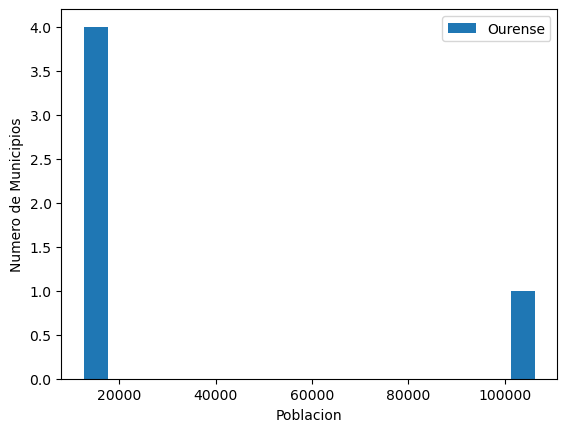

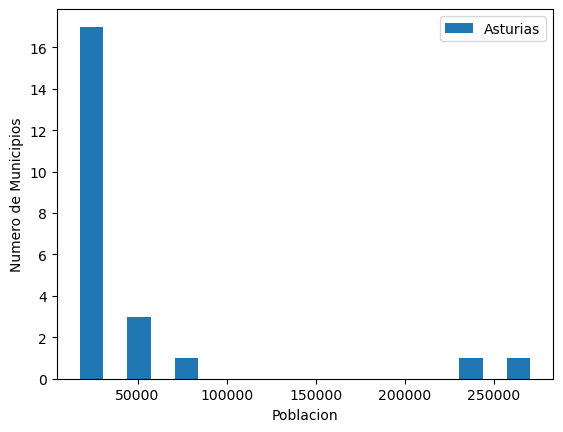

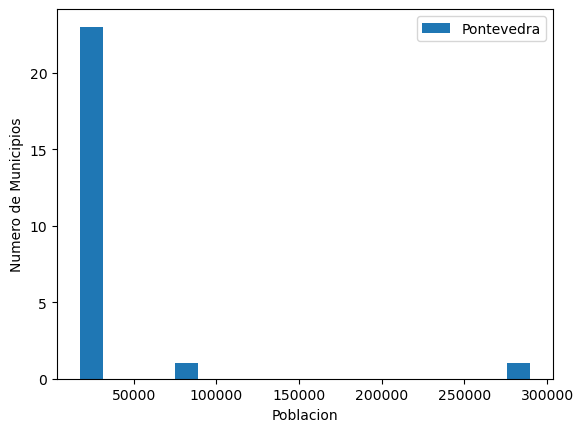

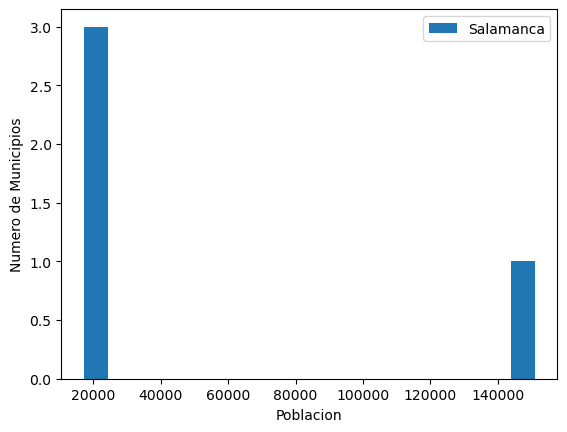

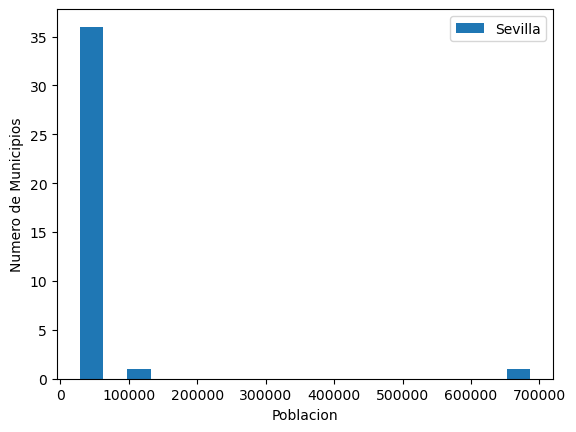

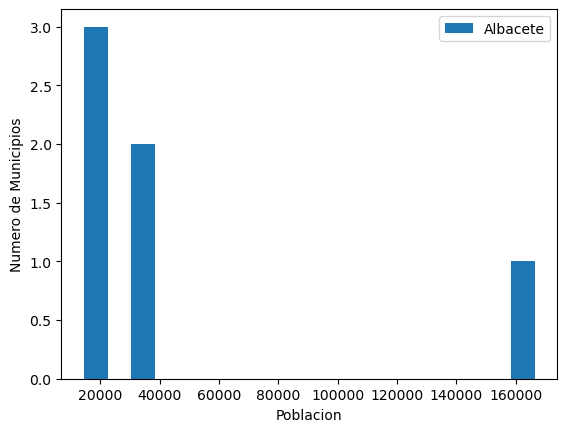

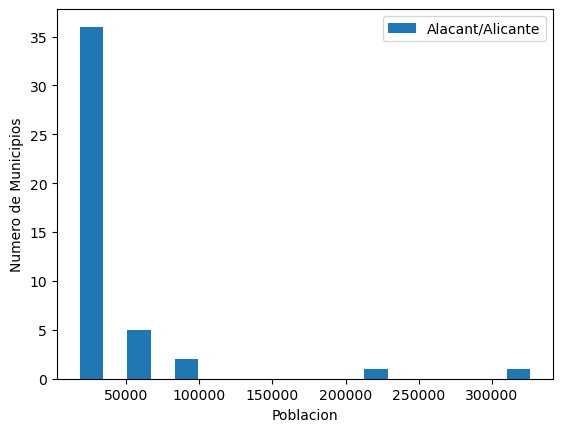

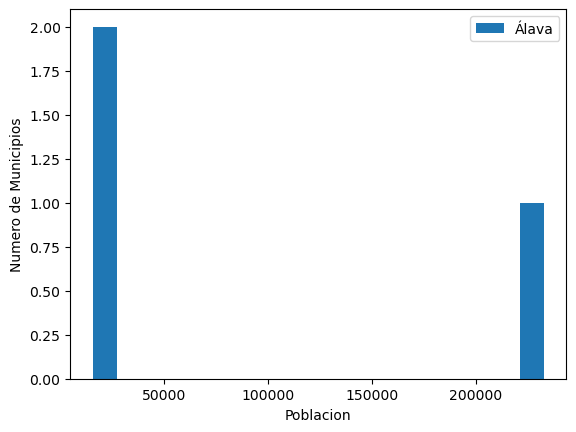

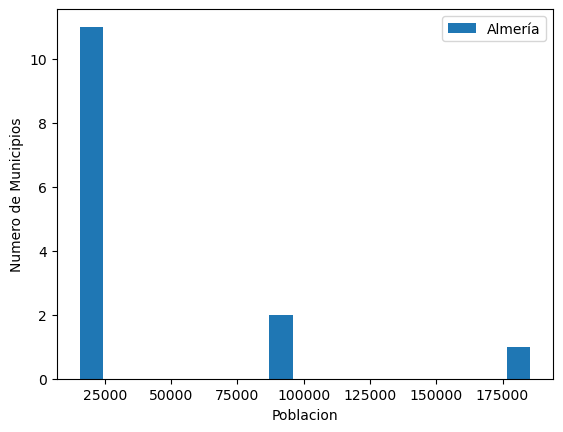

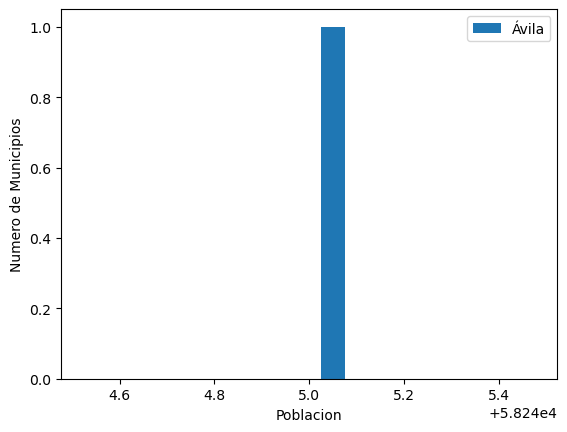

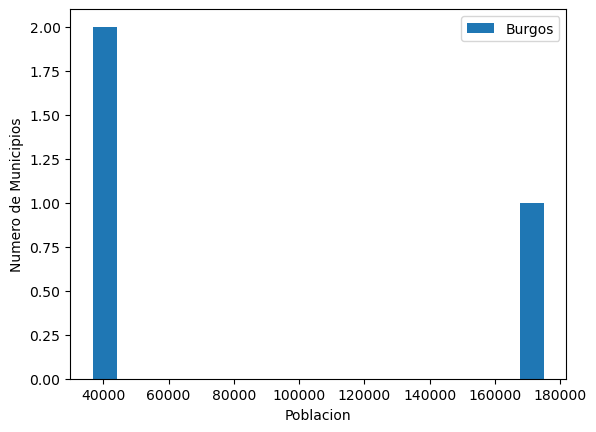

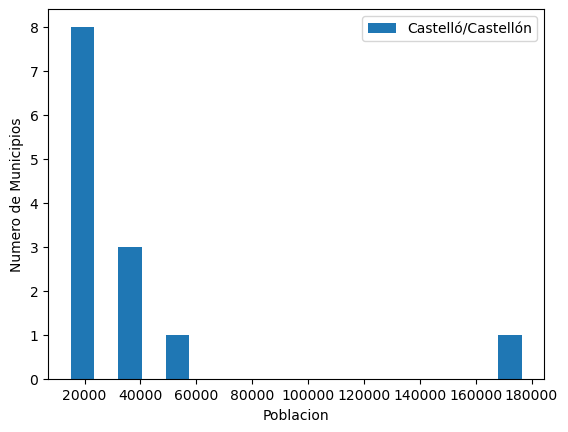

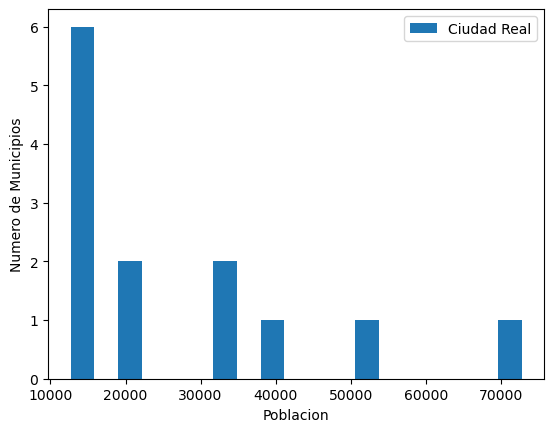

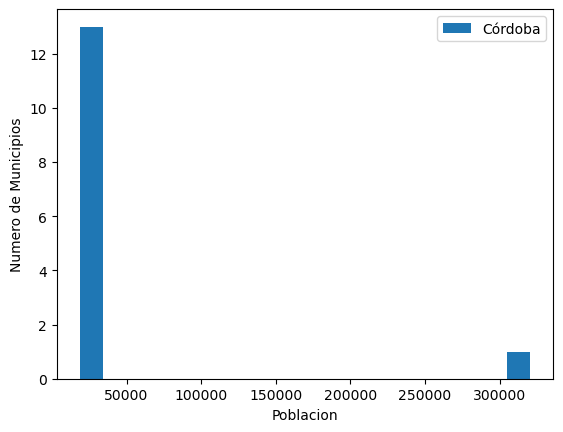

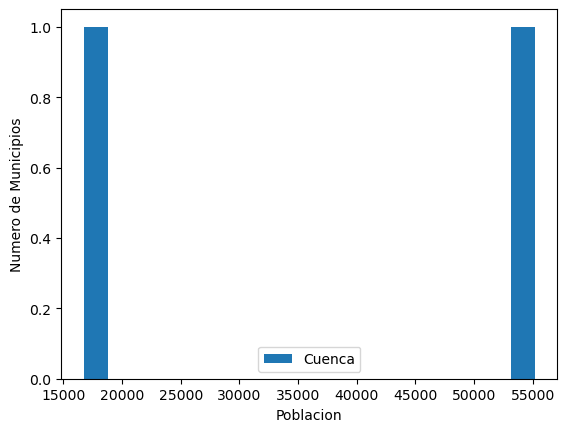

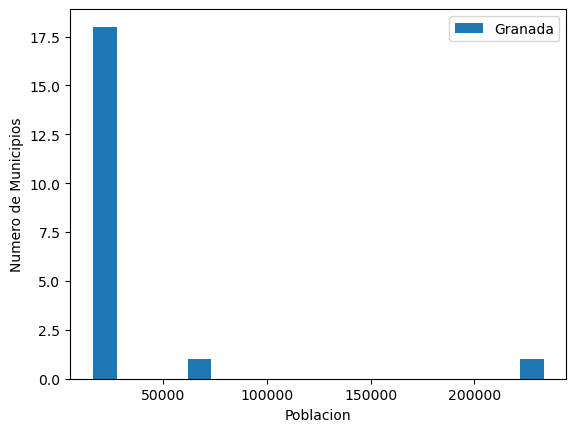

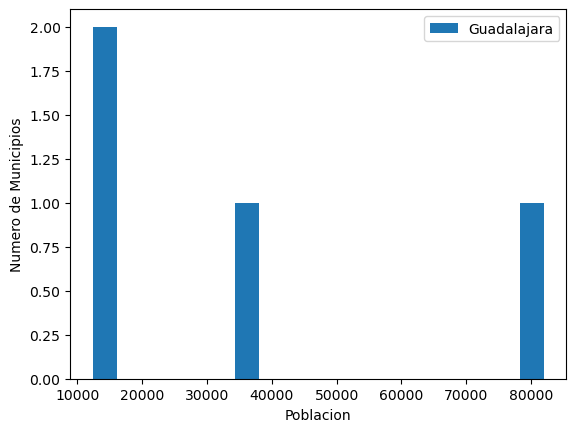

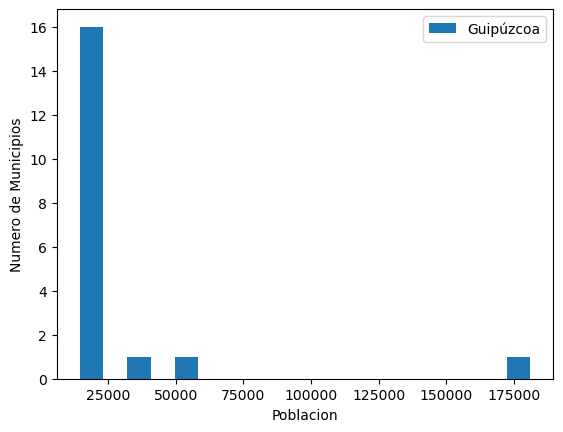

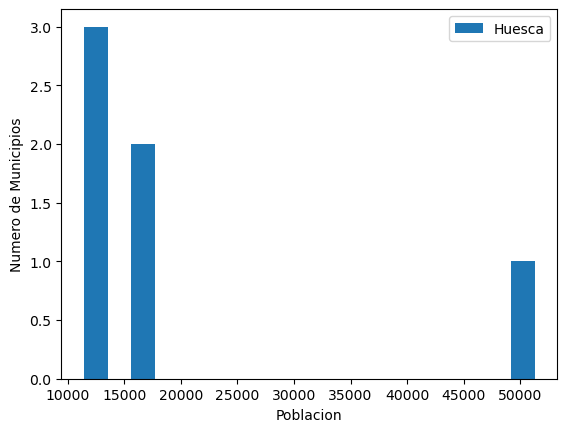

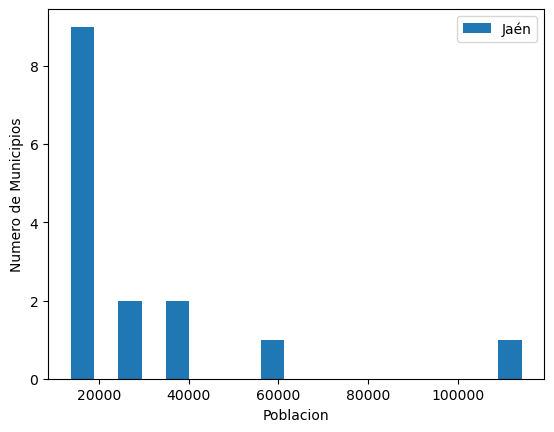

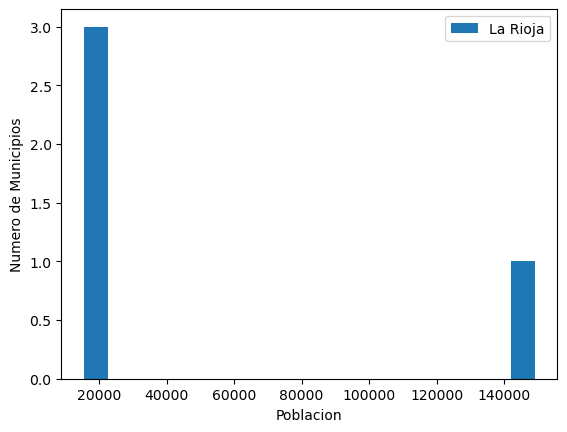

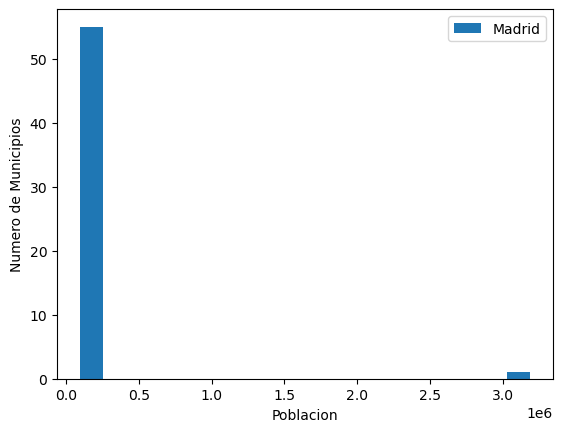

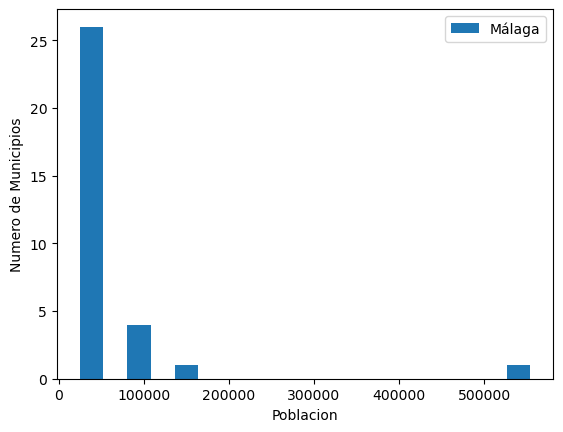

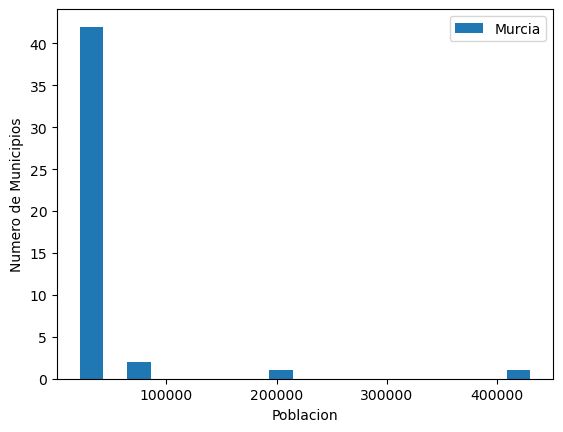

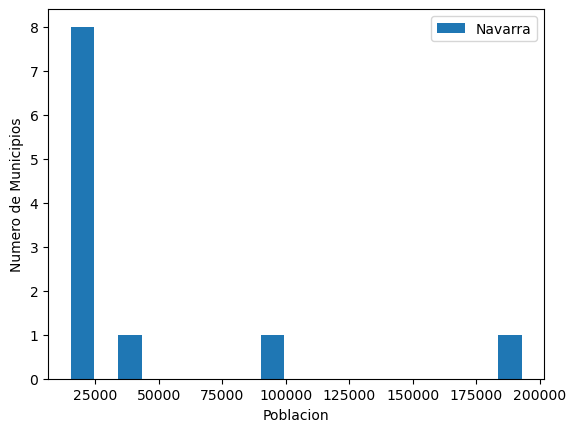

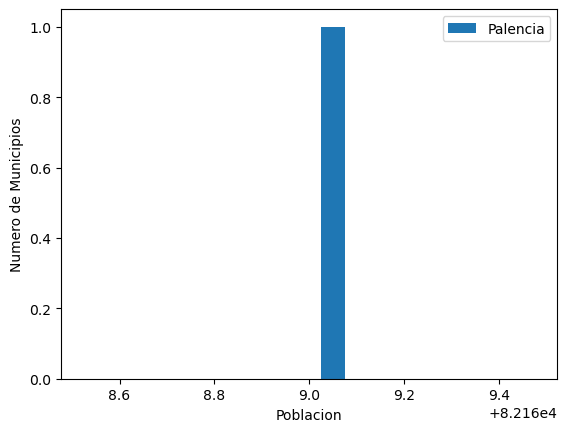

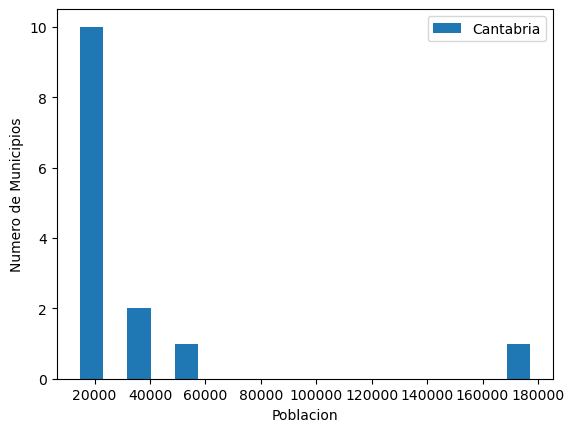

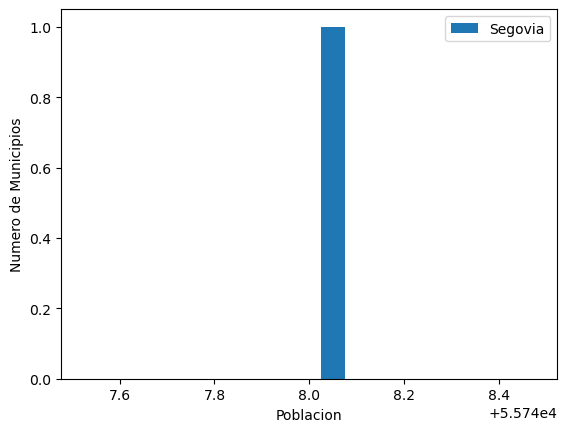

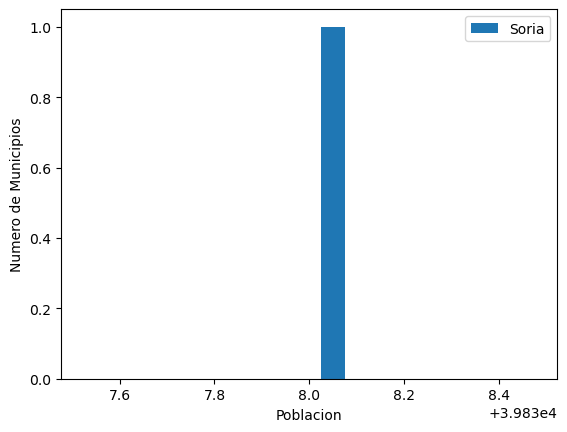

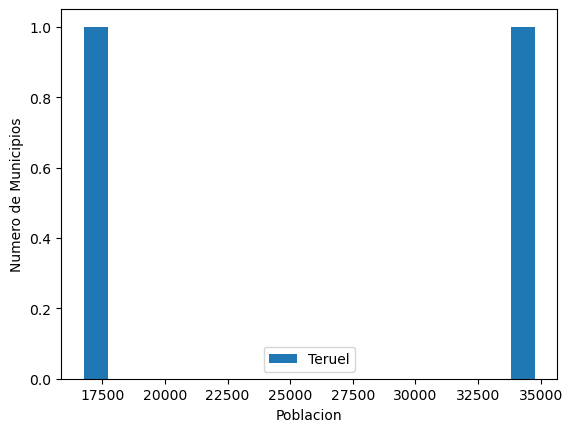

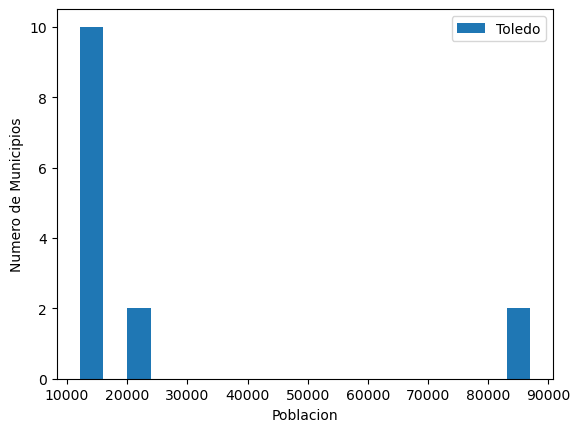

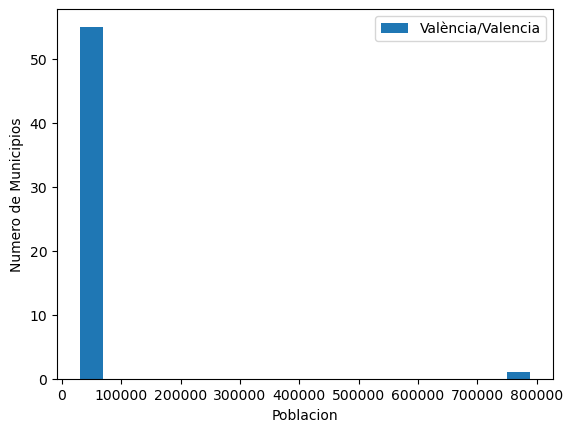

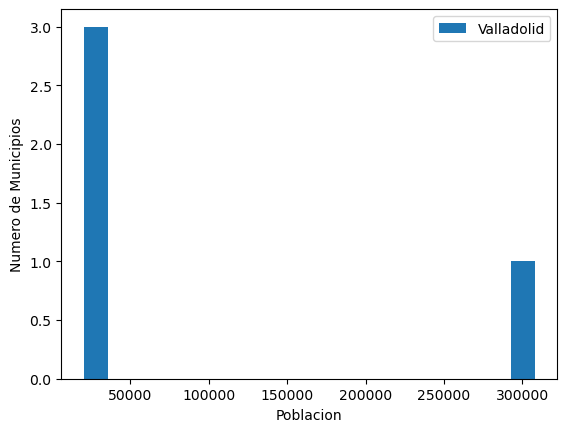

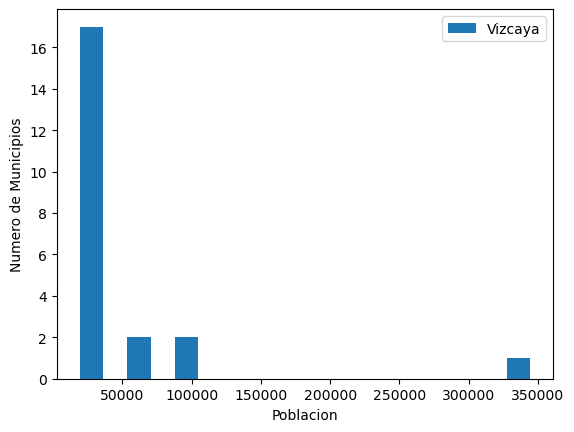

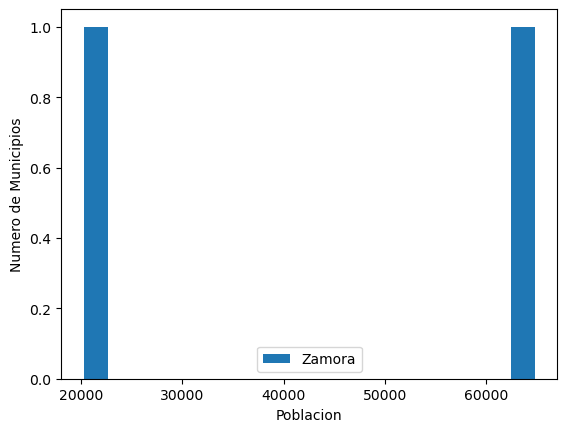

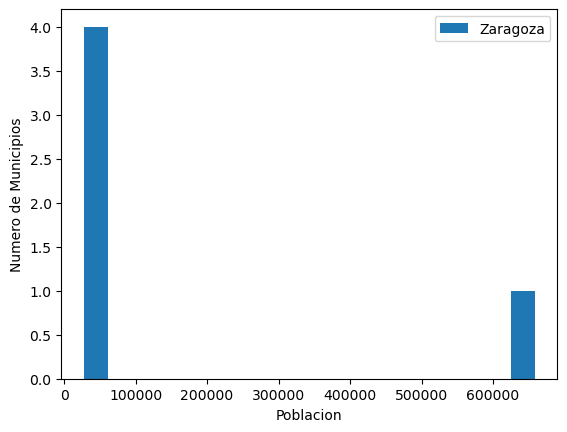

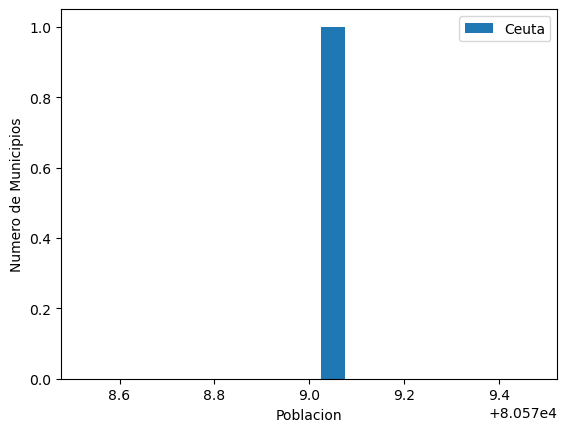

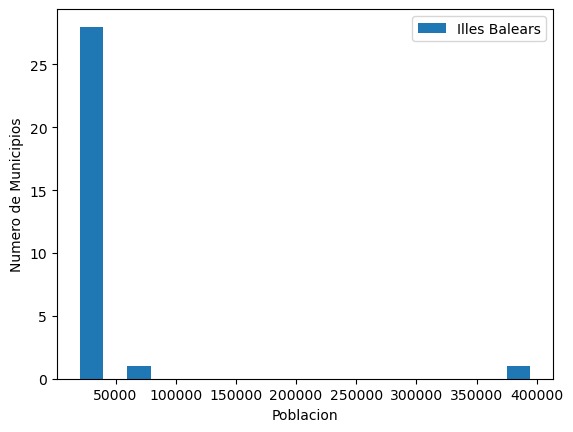

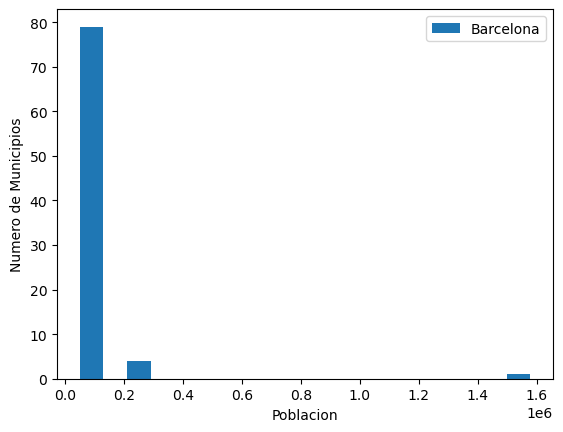

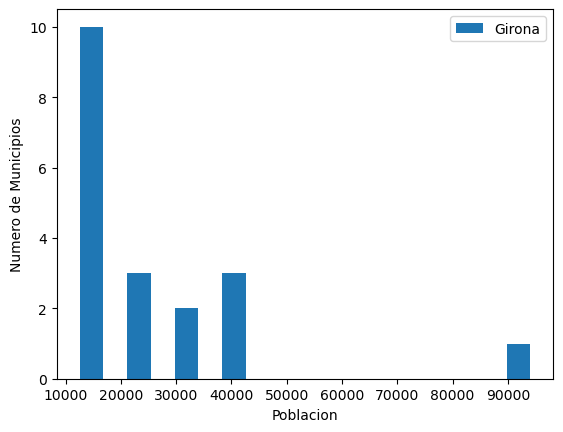

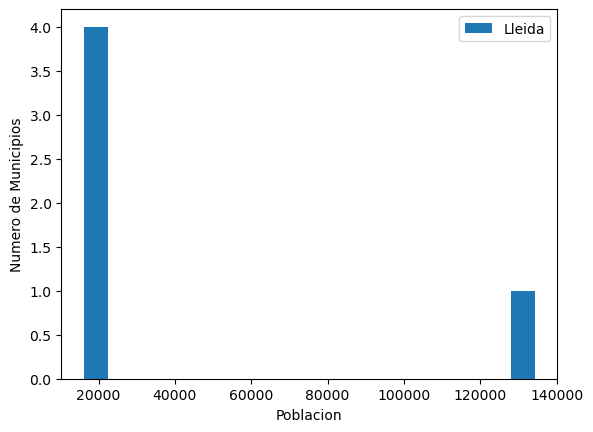

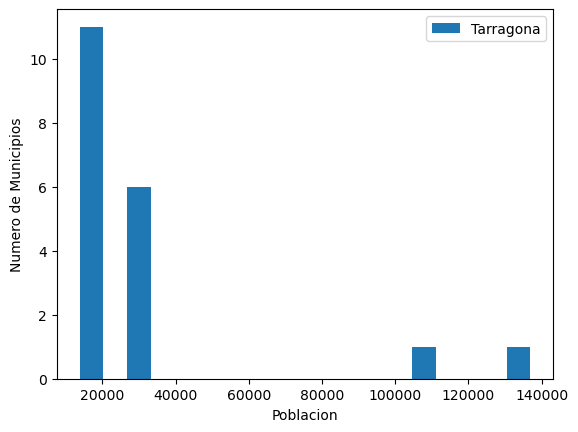

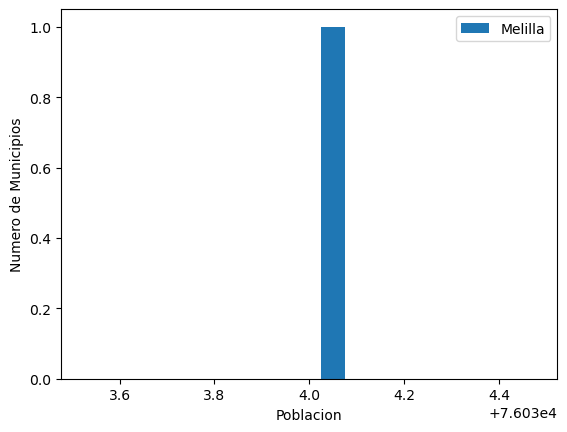

In [70]:
lista_provincias = df['Provincia'].unique() # se crea una lista con todas las provincias contenidas en el dataset.
lista_bins = [z for z in range(0,3500000,100000)] # se busca ajustar los bins/buckets creando una lista de numeros, se utilizo list comprehension
print(lista_bins)
for x in lista_provincias: #se recorre el listado de todas las provincias
    
    df_histograma = df.loc[df['Provincia'] == x] # al recorrese cada una de las provincias se crea un nuevo dataframe para la provincia en cuestion con ello garantizamos que se trabaje solo con los municipios de esa provincia
    
    plt.xlabel('Poblacion')
    plt.ylabel('Numero de Municipios')
    plt.hist(df_histograma['Poblacion'], rwidth = 0.5, label=x) #al no poderse encontrar el mejor bin se dejo en automatico para cada histograma.
    plt.legend()
    plt.show()

#### 7) Seleccione al azar cincuenta municipios diferentes de  entre los diponibles en el archivo. Asegúrese de que no  se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [76]:
lista_municipios = df['Municipio'].unique() # se crea una lista de todos los municipos existentes en el dataset
lista_municipios.size # se observa el tamaño de la lista para poder determinar el rango de numeros aleatorios que se deben generar

751

In [148]:
print(df[df.duplicated(['Municipio'])]) #se verifica si existen registros con el mismo municipio, y en efecto existen municipios registrados dos o mas veces pero que cuentan con poblacion distinta por lo que se les dara el trato de subsets y no de duplicados, ya que tienen una poblacion distinta

     FID  OBJECTID                           Texto  Poblacion  CodMun  \
751  751       752              Trobajo del Camino    21231.0   24142   
752  752       753                        Carrizal    12429.0   35011   
753  753       754                       Corralejo    14425.0   35014   
754  754       755                     Tamaraceite    25171.0   35016   
755  755       756                          Tafira    12698.0   35016   
..   ...       ...                             ...        ...     ...   
847  847       848             Infante Juan Manuel    14192.0   30030   
848  848       849           Santa Maria de Gracia    13349.0   30030   
849  849       850                    Vista Alegre    15208.0   30030   
850  850       851  Poligono Sta M de Benquerencia    19177.0   45168   
851  851       852                            Grao    16367.0   12040   

                                      Municipio  CodProvin  \
751                     San Andrés del Rabanedo         24   

In [143]:
import random
numero_aleatorio_municipios = random.sample(range(0,751),50) #se crea una lista de 50 numeros aleatorios sin repeticion utilizando sample en vez de randint

df_poblacion_aleatoria = pd.DataFrame(columns = df.columns) # se crea un nuevo DataFrame y se le asignan las mismas columnas que el dataframe original (df)

df_sin_municipios_duplicados = df.groupby('Municipio')['Poblacion'].sum().reset_index() #se crea un DataFrame basado en el DataFrame original (df) pero se utiliza .groupby y .sum para sumar la poblacion de los "duplicados" de algunos municipios donde si bien tienen distinto 'Texto' y numero de indice FID-ObjectID compartian el mismo Municipio y tienen distinta poblacion por lo que se asume que no son duplicados como tal sino subsets del mismo municipio   


for x in numero_aleatorio_municipios: #se recorre la lista de numeros aleatorios creada anteriormente
    
    municipio_escogido = lista_municipios[x] #se asigna el primer numero de la lista a la variable
    
    df_municipio_escogido = df_sin_municipios_duplicados.loc[df['Municipio'] == municipio_escogido] # se filtra el dataframe original basandose en el numero de indice y se asigna a un nuevo dataframe df_municipio_escogido
    df_poblacion_aleatoria = pd.concat([df_poblacion_aleatoria, df_municipio_escogido]) #se añade el dataframe anterior al dataframe vacio 'df_poblacion_aleatoria'
    

print(f'- El promedio de la poblacion de los 50 municipios aleatorios es: {df_poblacion_aleatoria["Poblacion"].mean():.2f}')
print(f'- La desviacion estandar de la poblacion  de los 50 municipios escogidos al azar es de: {df_poblacion_aleatoria["Poblacion"].std():.2f} ')
#df_poblacion_aleatoria.head()  
#df_poblacion_aleatoria.shape

- El promedio de la poblacion de los 50 municipios aleatorios es: 58136.82
- La desviacion estandar de la poblacion  de los 50 municipios escogidos al azar es de: 123071.19 


#### 8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero. 

In [147]:
print(df[df['Municipio']=="Madrid"].count()) #se buysca saber si existen varios registros con el nombre "Madrid" como "Municipio"
print()
print(df[df['Municipio']=='Madrid'].iloc[0,:]) #Se busca conocer los valores de X y Y para Madrid.
df.columns

FID            1
OBJECTID       1
Texto          1
Poblacion      1
CodMun         1
Municipio      1
CodProvin      1
Provincia      1
X              1
Y              1
Dist_Madrid    0
dtype: int64

FID                  355
OBJECTID             356
Texto             Madrid
Poblacion      3273049.0
CodMun             28079
Municipio         Madrid
CodProvin             28
Provincia         Madrid
X              -3.703797
Y               40.41663
Dist_Madrid         None
Name: 355, dtype: object


Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y', 'Dist_Madrid'],
      dtype='object')

In [178]:
import math 

df_distancia = df.copy()
#df_distancia = df_distancia.drop_duplicates(subset=['Municipio'])    #Aqui se buscaba retirar los duplicados por que aparecen registros con el mismo municipio perro sus coordenadas X,Y son distintas por lo que se decidio dejar ya que no influyen en la interpretacion de resultados de manera visual si se utiliza .unique.head()
df_distancia['Dist_Madrid'] = None
    

def diferencia_distancias(x,y):
    return math.dist((x,y),(-3.703797,40.41663))    
    

for indice, fila in df_distancia.iterrows():
    x = fila['X']
    y = fila['Y']
    distancia = diferencia_distancias(x,y)
    df_distancia.at[indice,'Dist_Madrid'] = distancia


Mas_cercanos = df_distancia.sort_values('Dist_Madrid', ascending = True) 
Mas_cercanos = Mas_cercanos.drop_duplicates(subset='Municipio',keep='first')

Mas_lejanos = df_distancia.sort_values('Dist_Madrid', ascending = False)
Mas_lejanos = Mas_lejanos.drop_duplicates(subset='Municipio',keep='first')

In [179]:
Mas_cercanos.head(10)  

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Dist_Madrid
355,355,356,Madrid,3273049.0,28079,Madrid,28,Madrid,-3.703797,40.416630,0.0
783,783,784,Humera-Somosaguas-prado del Rey,14800.0,28115,Pozuelo de Alarcón,28,Madrid,-3.783853,40.428764,0.08097
780,780,781,El Bercial,12814.0,28065,Getafe,28,Madrid,-3.736771,40.327270,0.095249
781,781,782,Fortuna,12840.0,28074,Leganés,28,Madrid,-3.780326,40.358067,0.096365
347,347,348,Coslada,91218.0,28049,Coslada,28,Madrid,-3.565567,40.425937,0.138543
337,337,338,Alcorcón,168299.0,28007,Alcorcón,28,Madrid,-3.828495,40.351570,0.14065
336,336,337,Alcobendas,110080.0,28006,Alcobendas,28,Madrid,-3.632402,40.541042,0.143442
372,372,373,San Sebastián de los Reyes,78157.0,28134,San Sebastián de los Reyes,28,Madrid,-3.626719,40.547055,0.151498
349,349,350,Fuenlabrada,198973.0,28058,Fuenlabrada,28,Madrid,-3.790853,40.282219,0.160141
784,784,785,La Partija-Santa Monica,57757.0,28123,Rivas-Vaciamadrid,28,Madrid,-3.543108,40.368431,0.167762


In [180]:
Mas_lejanos.head(10)  

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Dist_Madrid
29,29,30,Los Llanos de Aridane,20948.0,38024,Los Llanos de Aridane,38,Santa Cruz de Tenerife,-17.914361,28.658639,18.444254
35,35,36,Santa Cruz de la Palma,17128.0,38037,Santa Cruz de la Palma,38,Santa Cruz de Tenerife,-17.765386,28.684138,18.313373
765,765,766,Los Cristianos,19383.0,38006,Arona,38,Santa Cruz de Tenerife,-16.716798,28.053827,17.949292
764,764,765,Playa de las Américas,18562.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729436,28.068070,17.948654
25,25,26,Guía de Isora,20535.0,38019,Guía de Isora,38,Santa Cruz de Tenerife,-16.782611,28.210439,17.889842
37,37,38,Santiago del Teide,12099.0,38040,Santiago del Teide,38,Santa Cruz de Tenerife,-16.816575,28.294316,17.857644
34,34,35,San Miguel,16707.0,38035,San Miguel de Abona,38,Santa Cruz de Tenerife,-16.614925,28.099646,17.843916
766,766,767,San Isidro,18371.0,38017,Granadilla de Abona,38,Santa Cruz de Tenerife,-16.560839,28.075612,17.821455
27,27,28,Icod de los Vinos,24231.0,38022,Icod de los Vinos,38,Santa Cruz de Tenerife,-16.713104,28.367248,17.732165
32,32,33,Realejo Alto,37658.0,38031,Los Realejos,38,Santa Cruz de Tenerife,-16.583189,28.376237,17.630933
